# Ejercicio 1
Dos bolas se seleccionan al azar de una urna que contiene 8 bolas blancas, 4 bolas negras, y 2
bolas naranjas. Supongamos que ganamos la cantidad de 2 pesos por cada bola negra seleccionada y
perdemos la cantidad de 1 peso por cada bola blanca seleccionada. Sea $X$ la variable aleatoria que
denota nuestra ganancia. ¿Cual es la ley de $X$? Calcula la esperanza y varianza de $X$.

### Solución:
Primero debemos modelar una función que imite el comportamiento del experimento para ello proponemos la siguiente.

In [1]:
import random

def urna(blancas, negras , naranjas, elecciones):
    if(blancas+negras+naranjas >= elecciones):
        caja = []
        #Agregamos las "Bolas correspondientes"
        for n in range(blancas):
            caja.append('B')
        for n in range(negras):
            caja.append('N')
        for n in range(naranjas):
            caja.append('O')    
        #Procedemos a realizar las elecciones de las bolas
        ganancia = 0
        tomadas = []
        #cada iteracion de este ciclo representa el experimento
        #de seleccionar una bola de la urna sin remplazo
        for e in range(elecciones):
            eleccion = random.randint(0,len(caja)-1) #se selecciona una bola
            bola  = caja.pop(eleccion) #se retira de la urna
            tomadas.append(bola)     #se guarda la bola escogida
            #Obtenemos la ganancia de la eleccion
            if bola == 'B':
                ganancia += -1
            elif bola == 'N':
                ganancia += 2
        return sorted(tomadas), ganancia
            
    else:
        print("La urna no tiene remplazo, y hay mas elecciones que bolas a tomar")


Nuestra función contiene los paramentros: (blancas, negras , naranjas, elecciones) , que corresponden al número de bolas de su respectivo color dentro de la urna. El parametro elecciones representa el numero de bolas a seleccionar en el experimento, considerando que no hay remplazo en la urna, por lo tanto a lo más el número de elecciones debe ser igual al numero de bolas totales.

La funcion retorna una tupla que contiene en su primera posicion la lista ordenada de las bolas seleccionadas, y en la segunda la ganancia obtenida durante el experimento.



La siguiente funcion se encarga de reproducir el experimento del ejercicio $n$ veces y retorna un diccionario con las frecuencias obtenidas para cada ganancia.

In [2]:
from collections import defaultdict

def experimentoUrna(n):
    frecuencias = defaultdict(int)
    #Repeticiones del experimento
    for x in range(n):   
        experimento = urna(8,4,2,2)
        frecuencias[experimento[1]] +=1
    
    frecuencias = sorted(frecuencias.items())
    #Resultados
    return frecuencias

 En las siguientes celdas obtenemos la frecuencia relativa. La funcion auxiliar nos ayuda a calcular la probabilidad de cada ganancia, asi como la esperanza y varianza de $X$

In [3]:
def aux(frecuencias, repeticiones):
    esperanza = 0;
    varianza = 0;
    
    for clave, valor in frecuencias:
        probabilidad = valor/repeticiones
        print("La probabilidad de obtener una ganancia de ", clave , " es: " , probabilidad)
        esperanza += probabilidad*clave;
        varianza += probabilidad * pow(clave,2)
        
    print("\nLa esperanza de X es :",esperanza)
    print("La varianza de X es :", varianza)
    

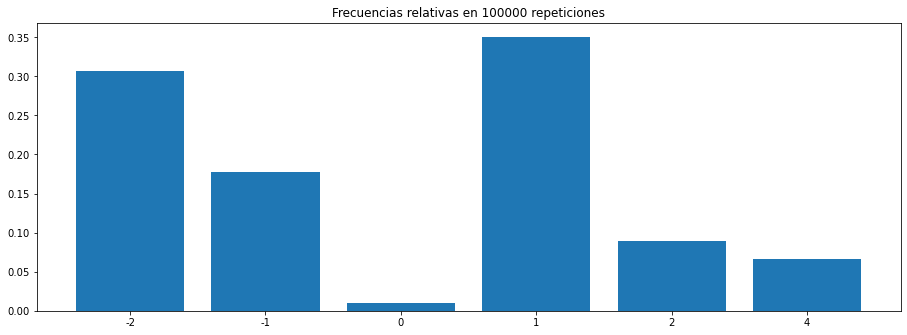

La probabilidad de obtener una ganancia de  -2  es:  0.30666
La probabilidad de obtener una ganancia de  -1  es:  0.17698
La probabilidad de obtener una ganancia de  0  es:  0.01044
La probabilidad de obtener una ganancia de  1  es:  0.3509
La probabilidad de obtener una ganancia de  2  es:  0.0892
La probabilidad de obtener una ganancia de  4  es:  0.06582

La esperanza de X es : 0.0022800000000000042
La varianza de X es : 3.16444


In [4]:
import matplotlib.pyplot as plt

n = 100000
frecuencias = experimentoUrna(n)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
resultado = [str(i) for i,j in frecuencias]
frecuencia = [j/n for i,j in frecuencias]
ax.bar(resultado,frecuencia)
plt.title("Frecuencias relativas en "+str(n)+" repeticiones")
plt.show()

aux(frecuencias,n)

Por último sólo comparamos con nuestros resultados obtenidos de manera teorica:
$$\begin{array}{cll}             
P(x =-2) = & \frac{28}{91} = & 0.3077 \\
P(x =-1) =& \frac{16}{91} = & 0.1757 \\
P(x = 0) = & \frac{1}{91} =  & 0.0109 \\
P(x = 1) = & \frac{32}{91} = & 0.3516 \\
P(x = 2) = & \frac{8}{91} =  & 0.0879 \\
P(x = 4) = & \frac{6}{91} =  & 0.0659 \\
\end{array}$$

Esperanza de $X = 0$

Varianza de $X$ = $\frac{288}{91} = 3.1648$